<a href="https://colab.research.google.com/github/prafullbhargava/Covid-19-Impact-Analysis-using-Python/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [58]:
data = pd.read_csv("transformed_data.csv")
data2 = pd.read_csv("raw_data.csv")
print(data)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


In [59]:
print(data.head)

<bound method NDFrame.head of       CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  

In [60]:
print(data2.head)

<bound method NDFrame.head of       iso_code     location        date  total_cases  total_deaths  \
0          AFG  Afghanistan  2019-12-31          0.0           0.0   
1          AFG  Afghanistan  2020-01-01          0.0           0.0   
2          AFG  Afghanistan  2020-01-02          0.0           0.0   
3          AFG  Afghanistan  2020-01-03          0.0           0.0   
4          AFG  Afghanistan  2020-01-04          0.0           0.0   
...        ...          ...         ...          ...           ...   
50413      ZWE     Zimbabwe  2020-10-15       8055.0         231.0   
50414      ZWE     Zimbabwe  2020-10-16       8075.0         231.0   
50415      ZWE     Zimbabwe  2020-10-17       8099.0         231.0   
50416      ZWE     Zimbabwe  2020-10-18       8110.0         231.0   
50417      ZWE     Zimbabwe  2020-10-19       8147.0         231.0   

       stringency_index  population  gdp_per_capita  human_development_index  \
0                  0.00    38928341        1803.9

In [61]:
print("COUNTRY\t    no.of times ")
data["COUNTRY"].value_counts()

COUNTRY	    no.of times 


Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [62]:
# mode , finding the mode value of the data
data["COUNTRY"].value_counts().mode()

0    294
Name: COUNTRY, dtype: int64

In [63]:
code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)),
                               columns = ["Country Code", "Country", "Human Development Index",
                                          "Total Cases", "Total Deaths",
                                          "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country  Human Development Index  Total Cases  \
0          AFG  Afghanistan                 0.498000    5126433.0   
1          ALB      Albania                 0.600765    1071951.0   
2          DZA      Algeria                 0.754000    4893999.0   
3          AND      Andorra                 0.659551     223576.0   
4          AGO       Angola                 0.418952     304005.0   

   Total Deaths  Stringency Index  Population  
0      165875.0          3.049673   17.477233  
1       31056.0          3.005624   14.872537  
2      206429.0          3.195168   17.596309  
3        9850.0          2.677654   11.254996  
4       11820.0          2.965560   17.307957  


In [64]:
data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(data.head())

    Country Code        Country  Human Development Index  Total Cases  \
200          USA  United States                  0.92400  746014098.0   
27           BRA         Brazil                  0.75900  425704517.0   
90           IND          India                  0.64000  407771615.0   
157          RUS         Russia                  0.81600  132888951.0   
150          PER           Peru                  0.59949   74882695.0   

     Total Deaths  Stringency Index  Population  
200    26477574.0          3.350949   19.617637  
27     14340567.0          3.136028   19.174732  
90      7247327.0          3.610552   21.045353  
157     2131571.0          3.380088   18.798668  
150     3020038.0          3.430126   17.311165  


In [65]:
data = data.head(10)
print(data)

    Country Code         Country  Human Development Index  Total Cases  \
200          USA   United States                 0.924000  746014098.0   
27           BRA          Brazil                 0.759000  425704517.0   
90           IND           India                 0.640000  407771615.0   
157          RUS          Russia                 0.816000  132888951.0   
150          PER            Peru                 0.599490   74882695.0   
125          MEX          Mexico                 0.774000   74347548.0   
178          ESP           Spain                 0.887969   73717676.0   
175          ZAF    South Africa                 0.608653   63027659.0   
42           COL        Colombia                 0.581847   60543682.0   
199          GBR  United Kingdom                 0.922000   59475032.0   

     Total Deaths  Stringency Index  Population  
200    26477574.0          3.350949   19.617637  
27     14340567.0          3.136028   19.174732  
90      7247327.0          3.610552

In [66]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75,
                            11497.65, 7027.61, 9946.03,
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71,
                            10126.72, 6126.87, 8346.70,
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data)

    Country Code         Country  Human Development Index  Total Cases  \
200          USA   United States                 0.924000  746014098.0   
27           BRA          Brazil                 0.759000  425704517.0   
90           IND           India                 0.640000  407771615.0   
157          RUS          Russia                 0.816000  132888951.0   
150          PER            Peru                 0.599490   74882695.0   
125          MEX          Mexico                 0.774000   74347548.0   
178          ESP           Spain                 0.887969   73717676.0   
175          ZAF    South Africa                 0.608653   63027659.0   
42           COL        Colombia                 0.581847   60543682.0   
199          GBR  United Kingdom                 0.922000   59475032.0   

     Total Deaths  Stringency Index  Population  GDP Before Covid  \
200    26477574.0          3.350949   19.617637          65279.53   
27     14340567.0          3.136028   19.174732

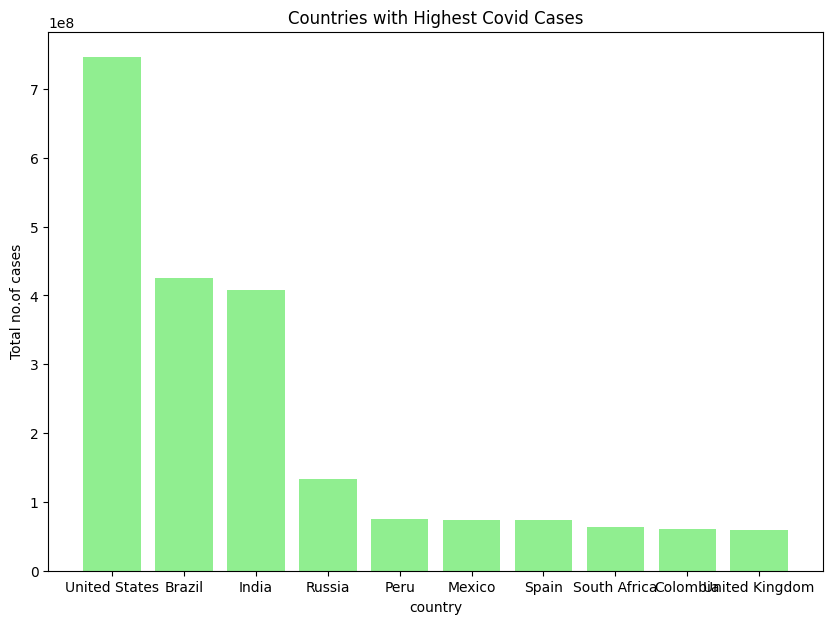

In [67]:
fig = plt.figure(figsize =(10, 7))
x = data["Country"].head(10)
y = data["Total Cases"].head(10)
plt.xlabel("country")
plt.ylabel("Total no.of cases")
plt.title("Countries with Highest Covid Cases")
plt.bar(x,y,color='lightgreen')
plt.show()

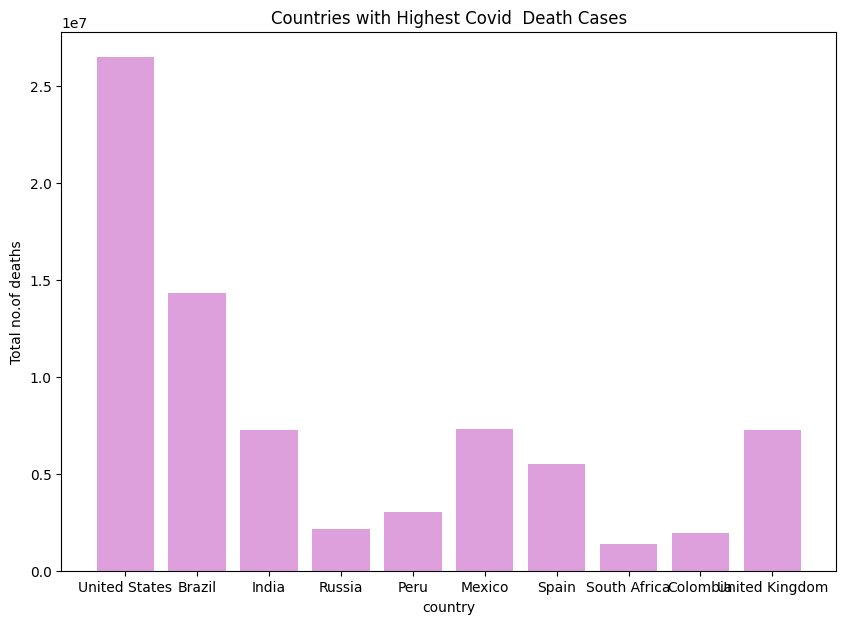

In [68]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['Total Deaths'].head(10)
plt.xlabel("country")
plt.ylabel("Total no.of deaths")
plt.title("Countries with Highest Covid  Death Cases")
plt.bar(x,y,color='plum')
plt.show()

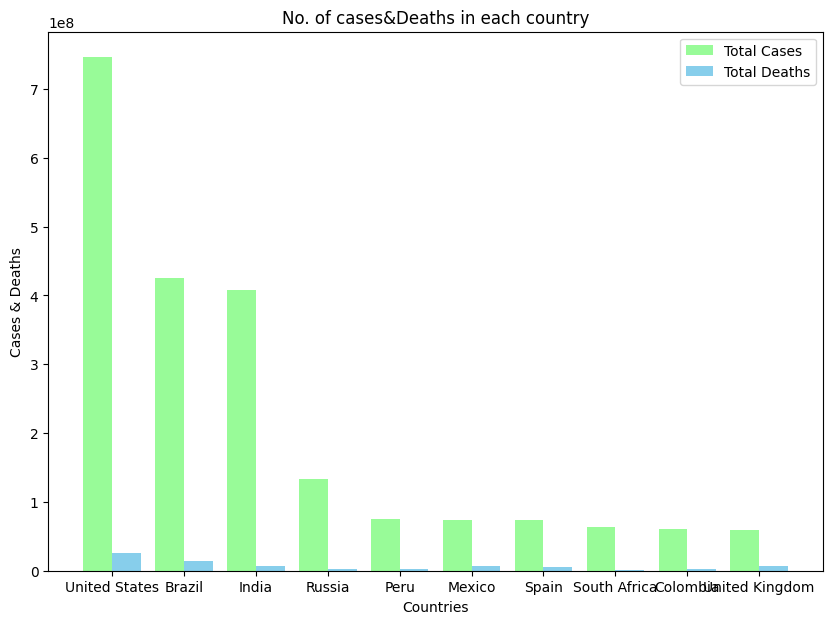

In [69]:
fig = plt.figure(figsize =(10, 7))
# x is countries
x = data['Country'].head(10)
# y is no.of cases
y = data['Total Cases'].head(10)
# z is no.of Deaths
z = data['Total Deaths'].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y,0.4,label = 'Total Cases',color = 'palegreen')
plt.bar(x_axis + 0.2, z,0.4,label = 'Total Deaths',color = 'skyblue')

plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("Cases & Deaths")
plt.title("No. of cases&Deaths in each country")
plt.legend()
plt.show()

In [70]:
cases_per = data['Total Cases'].head().sum()
deaths_per = data['Total Deaths'].head().sum()
print("The Percentage of the cases : ",cases_per)
print("The Percentage of the deaths: ",deaths_per)

The Percentage of the cases :  1787261876.0
The Percentage of the deaths:  53217077.0


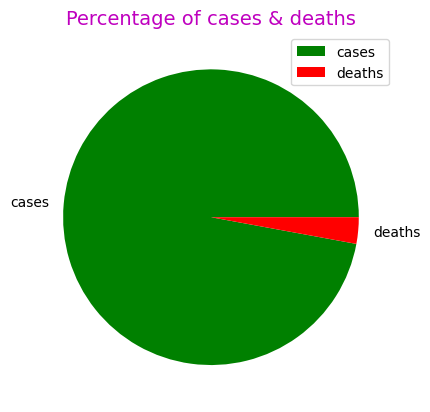

In [71]:
labels = ["Total Cases", "Total Deaths"]
values = [cases_per, deaths_per]
mylabels=['cases','deaths']
mycolor = ['green','red']
plt.pie(values,labels=mylabels,colors=mycolor,)
plt.title("Percentage of cases & deaths",fontsize=14,color='m')
plt.legend()

In [72]:
death_rate = (data['Total Deaths'].sum()/data['Total Cases'].sum())*100
print("The death rate is : ",death_rate)

The death rate is :  3.6144212045653767


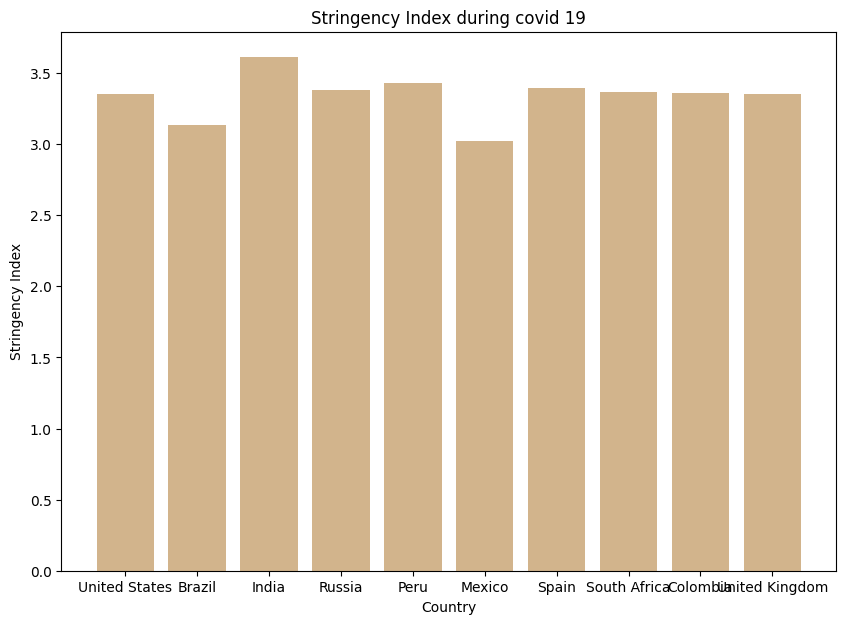

In [73]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['Stringency Index'].head(10)
plt.bar(x,y,color = 'tan')
plt.title("Stringency Index during covid 19")
plt.xlabel("Country")
plt.ylabel("Stringency Index")
plt.show()

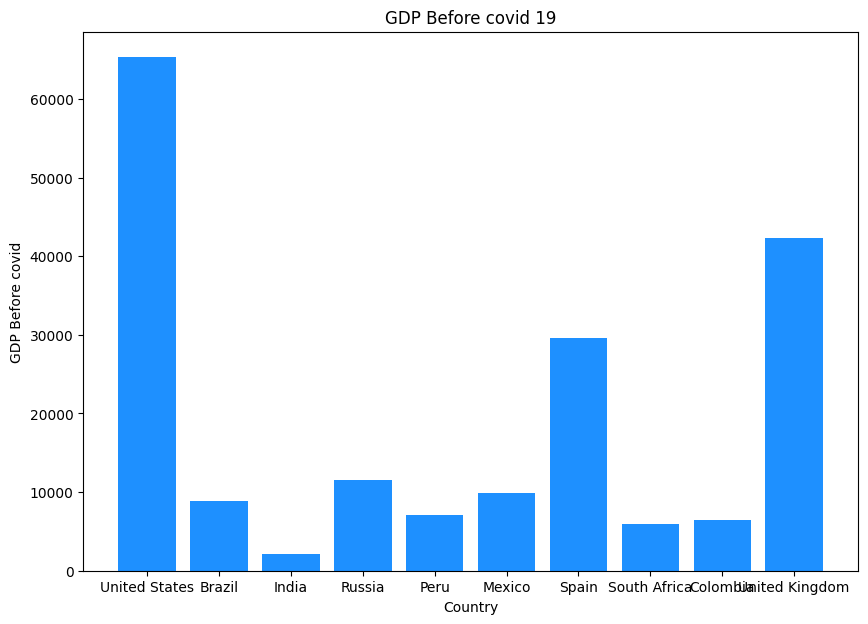

In [74]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['GDP Before Covid'].head(10)
plt.bar(x,y,color = 'dodgerblue')
plt.title("GDP Before covid 19")
plt.xlabel("Country")
plt.ylabel("GDP Before covid")
plt.show()

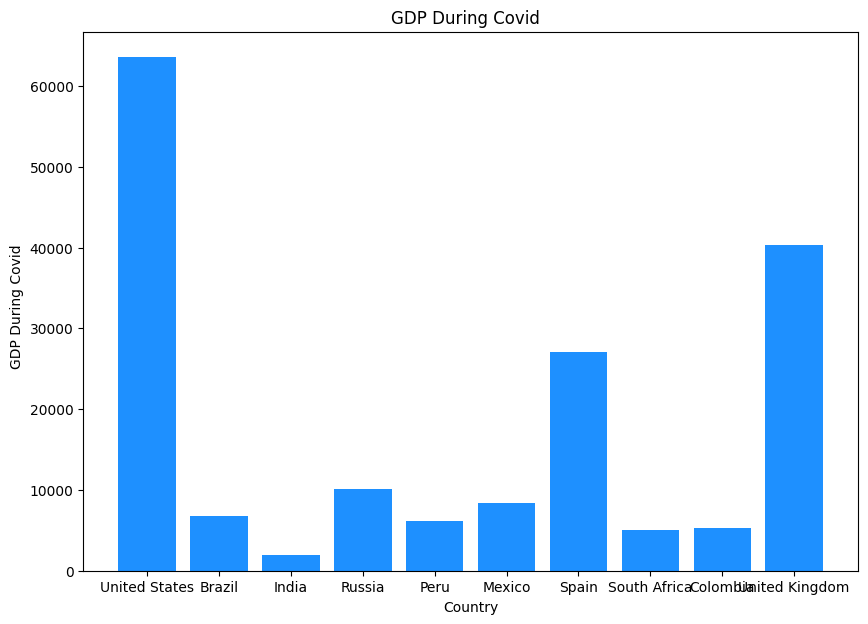

In [75]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['GDP During Covid'].head(10)
plt.bar(x,y,color = 'dodgerblue')
plt.title("GDP During Covid  ")
plt.xlabel("Country")
plt.ylabel("GDP During Covid  ")
plt.show()

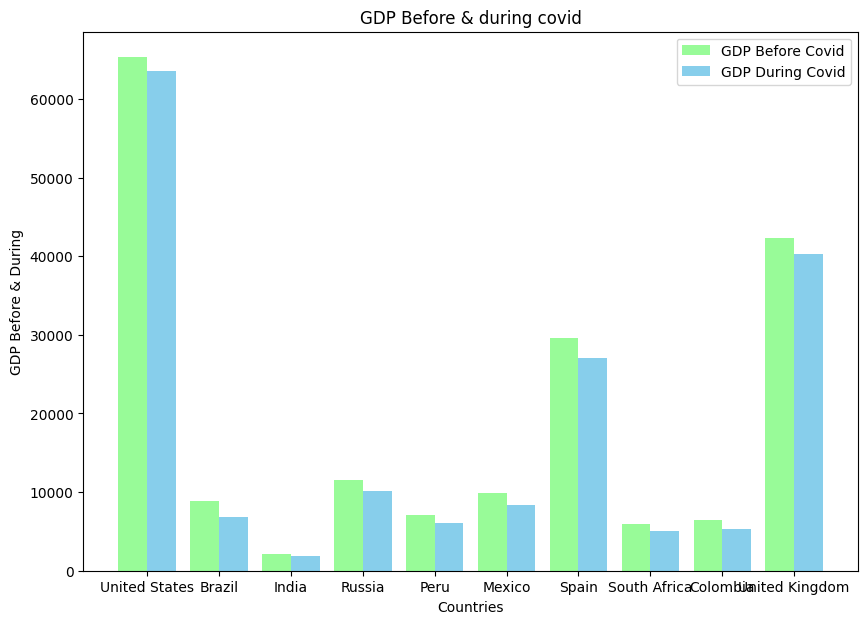

In [76]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['GDP Before Covid'].head(10)
z = data['GDP During Covid'].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y,0.4,label = 'GDP Before Covid',color = 'palegreen')
plt.bar(x_axis + 0.2, z,0.4,label = 'GDP During Covid',color = 'skyblue')

plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("GDP Before & During")
plt.title("GDP Before & during covid")
plt.legend()
plt.show()

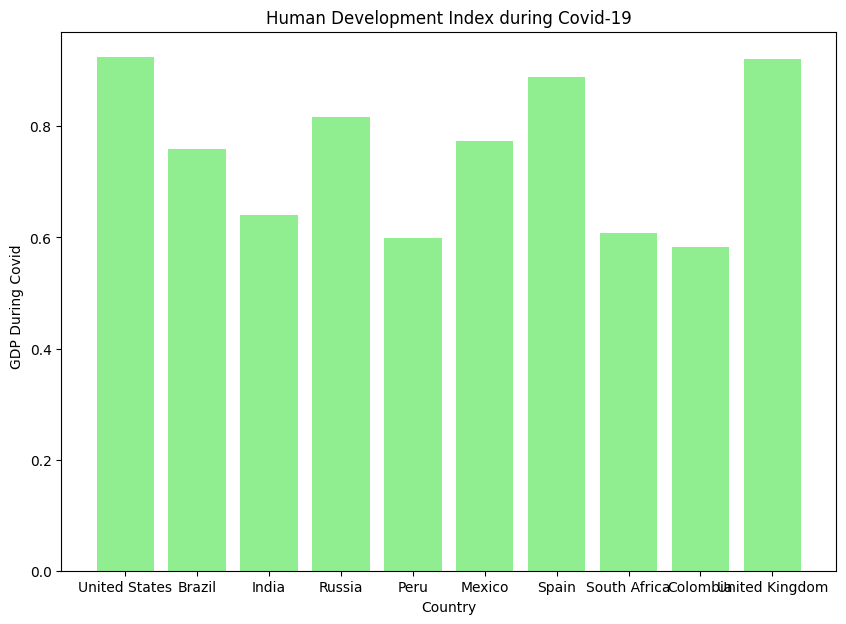

In [79]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['Human Development Index'].head(10)
plt.bar(x,y,color = 'lightgreen')
plt.title("Human Development Index during Covid-19")
plt.xlabel("Country")
plt.ylabel("GDP During Covid  ")
plt.show()